In [1]:
import numpy as np

### Load our pretrained model

In [2]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

In [3]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


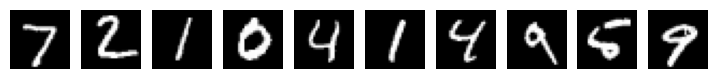

In [4]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

313/313 [==============================] - 2s 6ms/step


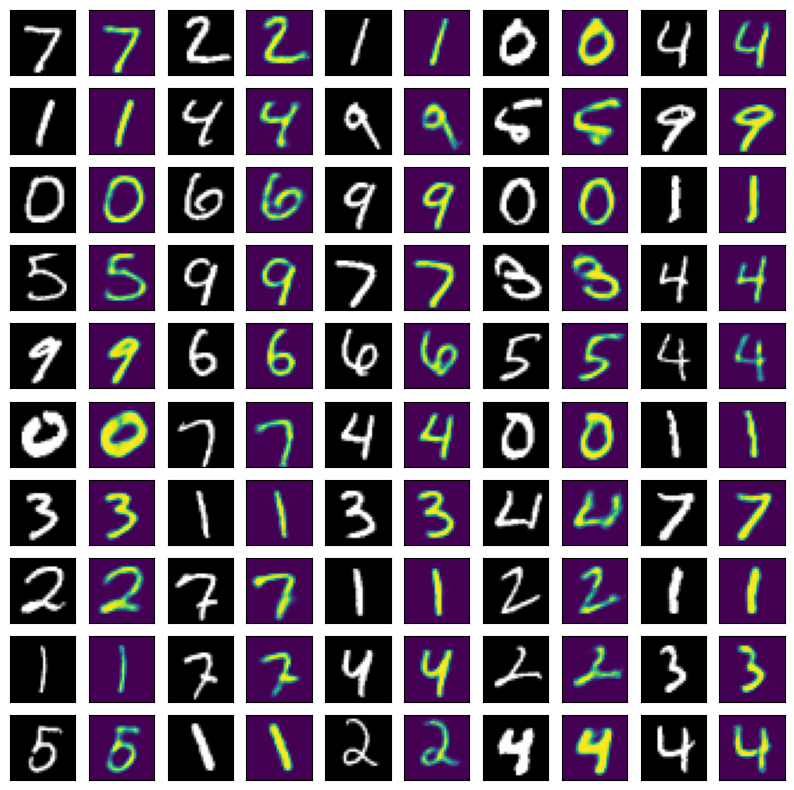

In [5]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### About Data
We had initially trained an autoencoder, with MNIST dataset, and we had Displayed the predictions for several random digits, comparing these to the original we can see that the predictions are pretty good & identifying the digits is good.
Autoencoders have a wide range of applications, including image and audio compression, anomaly detection, and data generation. In this exercise, we will compress and reconstruct images using autoencoders. We will use the MNIST dataset to train an autoencoder, which consists of 28x28 grayscale images of handwritten digits, and then use it to reconstruct random digits as well as a new character that we will add to the dataset.

In [6]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 16)                1616      
                                                                 
 dense_4 (Dense)             (None, 100)               1700      
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

In [7]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 20s 35ms/step - loss: 0.1885 - val_loss: 0.1323
Epoch 2/10
469/469 [==============================] - 16s 35ms/step - loss: 0.1222 - val_loss: 0.1135
Epoch 3/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1112 - val_loss: 0.1085
Epoch 4/10
469/469 [==============================] - 16s 33ms/step - loss: 0.1065 - val_loss: 0.1043
Epoch 5/10
469/469 [==============================] - 16s 35ms/step - loss: 0.1035 - val_loss: 0.1020
Epoch 6/10
469/469 [==============================] - 16s 33ms/step - loss: 0.1014 - val_loss: 0.1002
Epoch 7/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0997 - val_loss: 0.0989
Epoch 8/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0983 - val_loss: 0.0985
Epoch 9/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0973 - val_loss: 0.0976
Epoch 10/10
469/469 [==============================] - 16s 34ms/step - loss: 0.096

In [8]:
autoencoder.save('new_trained_autoencoder.h5')

In [9]:
# We have created a new autoencoder, and trained this autoencoder with the MNIST dataset,and also with my new images added we had also oversampled these images. 

1/1 [==============================] - 0s 221ms/step
(1, 784)


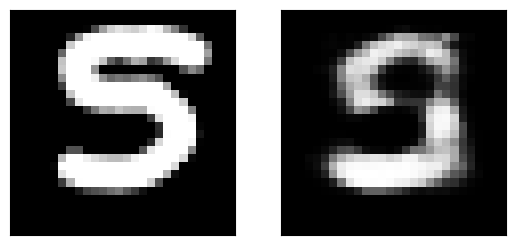

In [10]:
from PIL import Image
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing import image
updated_model = keras.models.load_model('new_trained_autoencoder.h5')


####################################
# load a sample image
image = tf.keras.utils.load_img('sampleimage1.png', target_size=(28, 28), color_mode = "grayscale")
image2=tf.keras.utils.load_img('sampleimage2.png',target_size=(28, 28), color_mode = "grayscale")
image3=tf.keras.utils.load_img('sampleimage3.png',target_size=(28, 28), color_mode = "grayscale")
image4=tf.keras.utils.load_img('sampleimage4.png',target_size=(28, 28), color_mode = "grayscale")
image5=tf.keras.utils.load_img('sampleimage5.png',target_size=(28, 28), color_mode = "grayscale")
####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr=tf.keras.utils.img_to_array(image2)
input_arr=tf.keras.utils.img_to_array(image3)
input_arr=tf.keras.utils.img_to_array(image4)
input_arr=tf.keras.utils.img_to_array(image5)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image5, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()



In [11]:
from tensorflow import keras

# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

input_arr = input_arr.reshape(784)

np.random.shuffle(train_images)

bad_images = [input_arr for _ in range(5000)]
new_image_set = np.vstack((train_images[:50000], bad_images))
np.random.shuffle(new_image_set)

new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=50, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)
Epoch 1/50
86/86 [==============================] - 8s 71ms/step - loss: 0.0982 - val_loss: 0.0956
Epoch 2/50
86/86 [==============================] - 6s 69ms/step - loss: 0.0948 - val_loss: 0.0953
Epoch 3/50
86/86 [==============================] - 6s 67ms/step - loss: 0.0940 - val_loss: 0.0950
Epoch 4/50
86/86 [==============================] - 5s 61ms/step - loss: 0.0935 - val_loss: 0.0953
Epoch 5/50
86/86 [==============================] - 6s 67ms/step - loss: 0.0930 - val_loss: 0.0950
Epoch 6/50
86/86 [==============================] - 6s 69ms/step - loss: 0.0926 - val_loss: 0.0950
Epoch 7/50
86/86 [==============================] - 6s 65ms/step - loss: 0.0922 - val_loss: 0.0950
Epoch 8/50
86/86 [==============================] - 6s 66ms/step - loss: 0.0918 - val_loss: 0.0952
Epoch 9/50
86/86 [==============================] - 6s 72ms/step - loss: 0.0915 - val_loss: 0.0948
Epoch 10/50
86/86 [==============================] 

313/313 [==============================] - 2s 6ms/step


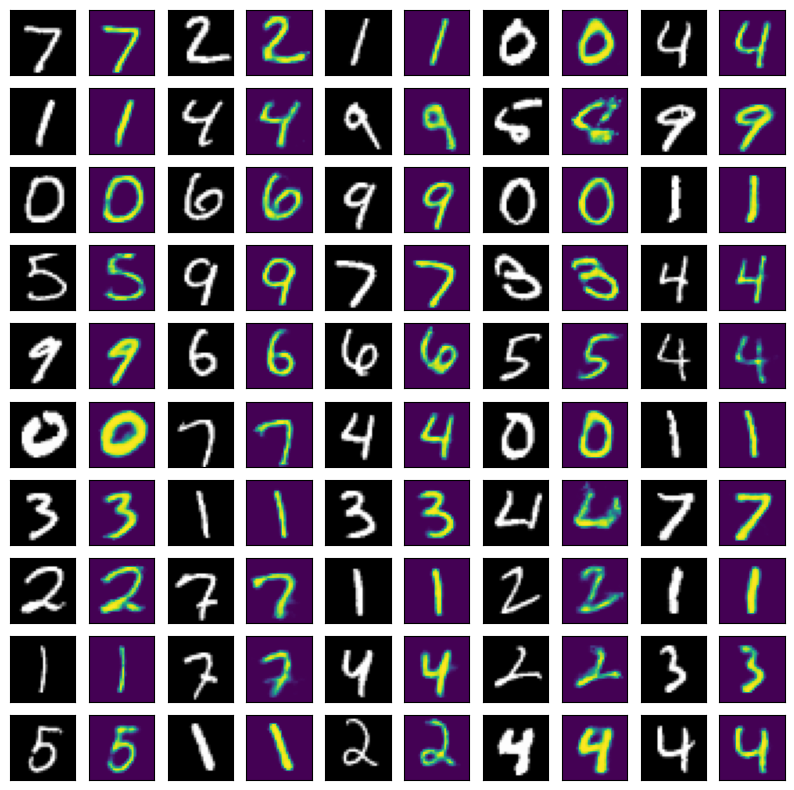

In [12]:
reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

1/1 [==============================] - 0s 25ms/step
(1, 784)


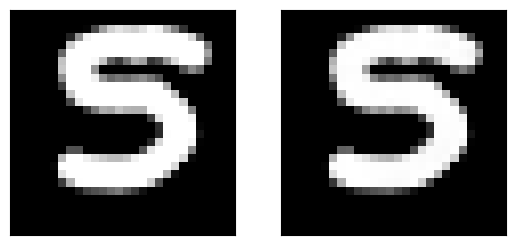

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image



image = tf.keras.utils.load_img('sampleimage1.png', target_size=(28, 28), color_mode = "grayscale")

image2=tf.keras.utils.load_img('sampleimage2.png',target_size=(28, 28), color_mode = "grayscale")
image3=tf.keras.utils.load_img('sampleimage3.png',target_size=(28, 28), color_mode = "grayscale")
image4=tf.keras.utils.load_img('sampleimage4.png',target_size=(28, 28), color_mode = "grayscale")
image5=tf.keras.utils.load_img('sampleimage5.png',target_size=(28, 28), color_mode = "grayscale")
####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr=tf.keras.utils.img_to_array(image2)
input_arr=tf.keras.utils.img_to_array(image3)
input_arr=tf.keras.utils.img_to_array(image4)
input_arr=tf.keras.utils.img_to_array(image5)

####################################
# predict an image from this sample
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image5, cmap="gray")





plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions.reshape(28,28), cmap="gray")


plt.show()
